In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import seaborn as sns
import numpy as np 

%matplotlib inline

In [2]:
C04_C06_df = pd.read_csv(Path('../Toronto_housing_market_analysis/Data/C01_C15_Clean_df.csv'))

display(C04_C06_df.head())
display(C04_C06_df.tail())

,Date,Location,CompBenchmark,CompYoYChange,SFDetachBenchmark,SFDetachYoYChange,ApartBenchmark,ApartYoYChange
0,2015-07-01,Toronto C01,478800.0,2.99,679500.0,-3.51,395600.0,3.32
1,2015-08-01,Toronto C01,486000.0,4.92,702800.0,-0.70,402100.0,5.63
2,2015-09-01,Toronto C01,488200.0,7.12,687600.0,-1.02,405200.0,8.29
3,2015-10-01,Toronto C01,484500.0,5.22,696100.0,1.49,399400.0,5.38
4,2015-11-01,Toronto C01,483000.0,4.22,706700.0,0.00,396200.0,4.39


,Date,Location,CompBenchmark,CompYoYChange,SFDetachBenchmark,SFDetachYoYChange,ApartBenchmark,ApartYoYChange
961,2020-11-01,Toronto C15,864800.0,6.99,1395400.0,2.20,585000.0,7.29
962,2020-12-01,Toronto C15,868400.0,5.69,1413300.0,4.15,583600.0,4.11
963,2021-01-01,Toronto C15,881100.0,5.89,1458800.0,9.67,587400.0,2.35
964,2021-02-01,Toronto C15,904400.0,6.33,1508100.0,12.23,603600.0,1.96
965,2021-03-01,Toronto C15,929700.0,6.66,1551800.0,13.46,620400.0,2.03


In [3]:
C04_C06_df.set_index('Date', inplace=True)
C04_C06_df

,Location,CompBenchmark,CompYoYChange,SFDetachBenchmark,SFDetachYoYChange,ApartBenchmark,ApartYoYChange
Date,,,,,,,
2015-07-01,Toronto C01,478800.0,2.99,679500.0,-3.51,395600.0,3.32
2015-08-01,Toronto C01,486000.0,4.92,702800.0,-0.70,402100.0,5.63
2015-09-01,Toronto C01,488200.0,7.12,687600.0,-1.02,405200.0,8.29
2015-10-01,Toronto C01,484500.0,5.22,696100.0,1.49,399400.0,5.38
2015-11-01,Toronto C01,483000.0,4.22,706700.0,0.00,396200.0,4.39
...,...,...,...,...,...,...,...
2020-11-01,Toronto C15,864800.0,6.99,1395400.0,2.20,585000.0,7.29
2020-12-01,Toronto C15,868400.0,5.69,1413300.0,4.15,583600.0,4.11
2021-01-01,Toronto C15,881100.0,5.89,1458800.0,9.67,587400.0,2.35


In [4]:
CompBenchmark = C04_C06_df[['Location','CompBenchmark']]
CompBenchmark.columns = ['Location','close']
CompBenchmark

,Location,close
Date,,
2015-07-01,Toronto C01,478800.0
2015-08-01,Toronto C01,486000.0
2015-09-01,Toronto C01,488200.0
2015-10-01,Toronto C01,484500.0
2015-11-01,Toronto C01,483000.0
...,...,...
2020-11-01,Toronto C15,864800.0
2020-12-01,Toronto C15,868400.0
2021-01-01,Toronto C15,881100.0


In [5]:
SFDetachBenchmark = C04_C06_df[['Location','SFDetachBenchmark']]
SFDetachBenchmark.columns = ['Location','close']
SFDetachBenchmark

,Location,close
Date,,
2015-07-01,Toronto C01,679500.0
2015-08-01,Toronto C01,702800.0
2015-09-01,Toronto C01,687600.0
2015-10-01,Toronto C01,696100.0
2015-11-01,Toronto C01,706700.0
...,...,...
2020-11-01,Toronto C15,1395400.0
2020-12-01,Toronto C15,1413300.0
2021-01-01,Toronto C15,1458800.0


In [6]:
ApartBenchmark = C04_C06_df[['Location','ApartBenchmark']]
ApartBenchmark.columns = ['Location','close']
ApartBenchmark

,Location,close
Date,,
2015-07-01,Toronto C01,395600.0
2015-08-01,Toronto C01,402100.0
2015-09-01,Toronto C01,405200.0
2015-10-01,Toronto C01,399400.0
2015-11-01,Toronto C01,396200.0
...,...,...
2020-11-01,Toronto C15,585000.0
2020-12-01,Toronto C15,583600.0
2021-01-01,Toronto C15,587400.0


In [7]:
from MCForecastTools3 import MCSimulation

Locations = CompBenchmark['Location'].unique()
Results = []

for Location in Locations:
    print(Location)
    CompBenchmark01 = pd.DataFrame(CompBenchmark[CompBenchmark['Location']==Location]['close'])
    SFDetachBenchmark01 = pd.DataFrame(SFDetachBenchmark[SFDetachBenchmark['Location']==Location]['close'])
    ApartBenchmark01 = pd.DataFrame(ApartBenchmark[ApartBenchmark['Location']==Location]['close'])
    Combined = pd.concat([CompBenchmark01, SFDetachBenchmark01, ApartBenchmark01], axis=1, keys=["CompBenchmark", "SFDetachBenchmark", "ApartBenchmark"])
    MC_5_years = MCSimulation(portfolio_data = Combined, weights = [1/3, 1/3, 1/3], num_simulation = 500, num_trading_days = 12*5)
    # Running a Monte Carlo simulation to forecast 5 years cumulative returns
    MC_5_years.calc_cumulative_return()
    Results.append(MC_5_years)
    # Plot probability distribution and confidence intervals
    #dist_plot = MC_5_years.plot_distribution()

Toronto C01
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tejaspatel/Documents/Toronto_housing_market_analysis/MCForecastTools3.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

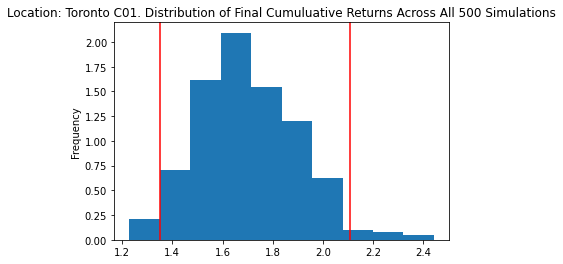

In [8]:
plot = Results[0].plot_distribution(location=Locations[0])

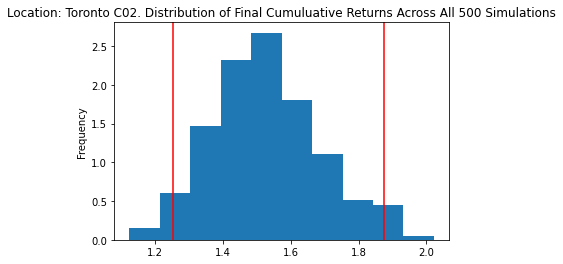

In [9]:
plot = Results[1].plot_distribution(location=Locations[1])

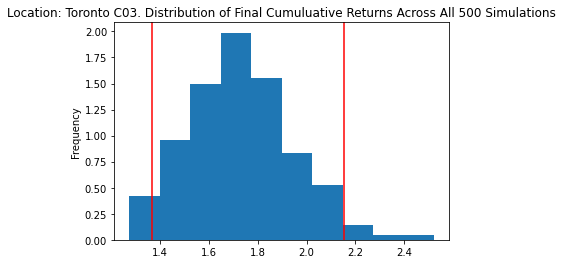

In [10]:
plot = Results[2].plot_distribution(location=Locations[2])

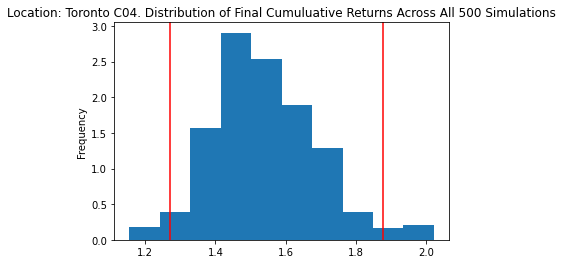

In [11]:
plot = Results[3].plot_distribution(location=Locations[3])

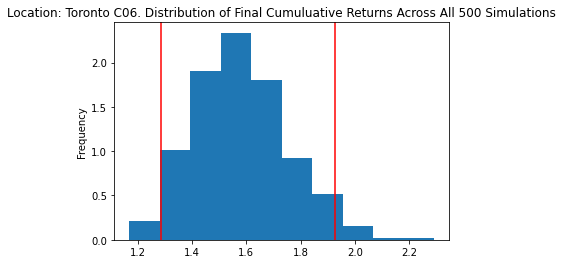

In [12]:
plot = Results[4].plot_distribution(location=Locations[4])

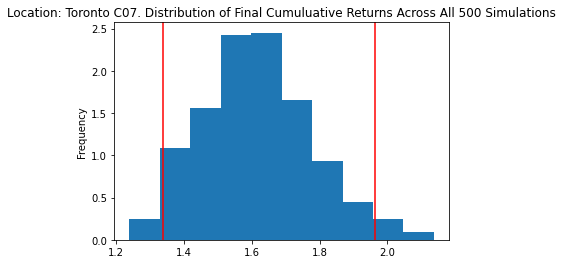

In [13]:
plot = Results[5].plot_distribution(location=Locations[5])

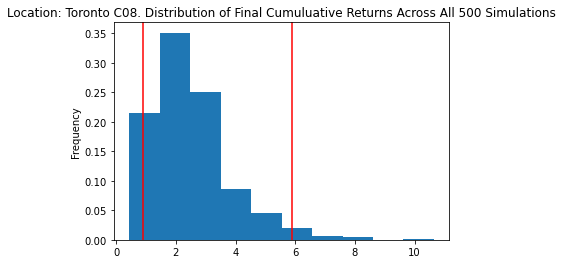

In [14]:
plot = Results[6].plot_distribution(location=Locations[6])

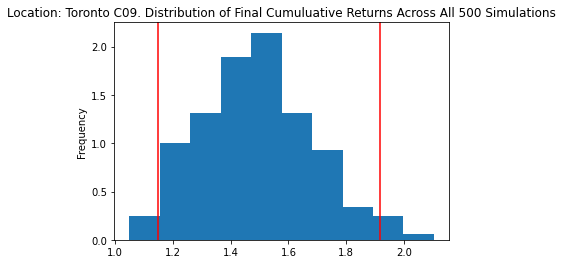

In [15]:
plot = Results[7].plot_distribution(location=Locations[7])

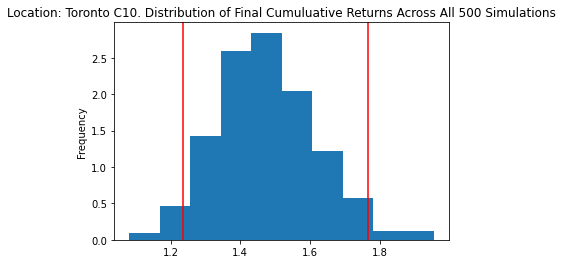

In [16]:
plot = Results[8].plot_distribution(location=Locations[8])

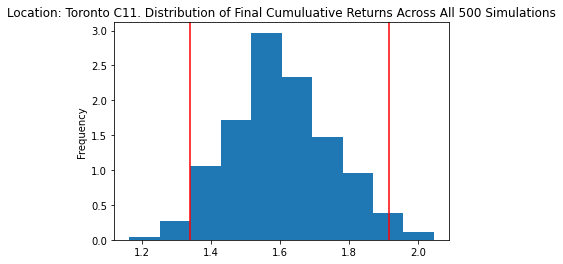

In [17]:
plot = Results[9].plot_distribution(location=Locations[9])

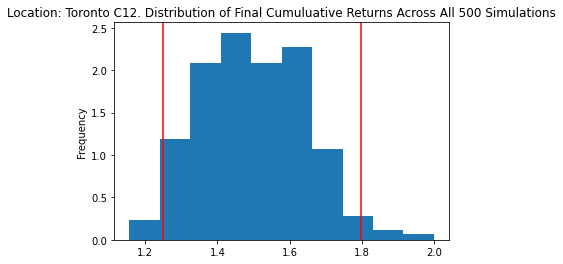

In [18]:
plot = Results[10].plot_distribution(location=Locations[10])

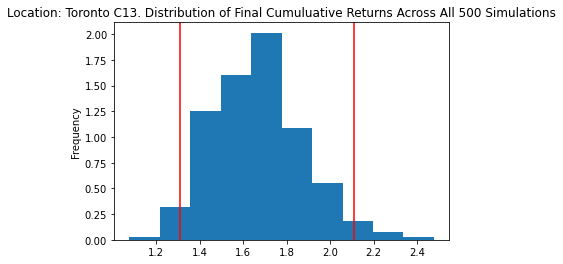

In [19]:
plot = Results[11].plot_distribution(location=Locations[11])

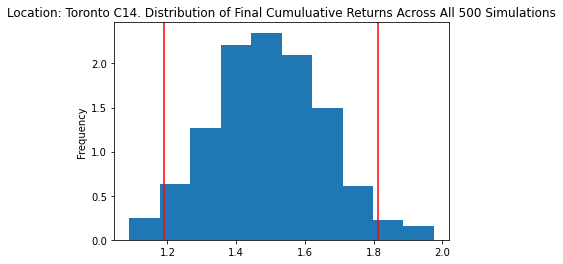

In [20]:
plot = Results[12].plot_distribution(location=Locations[12])

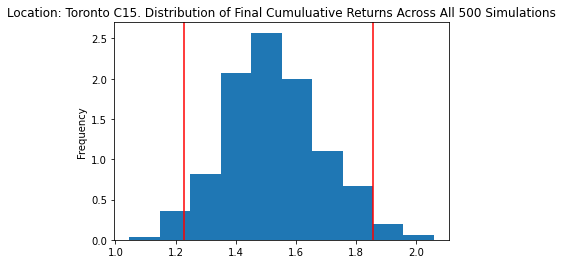

In [21]:
plot = Results[13].plot_distribution(location=Locations[13])